In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten, BatchNormalization
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
from keras.backend import tensorflow_backend
config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))
session = tf.Session(config=config)
tensorflow_backend.set_session(session)

In [3]:
PATH='/content/drive/Colab Notebooks/mnist/data/digit-recognizer/'
train = pd.read_csv(f'{PATH}train.csv')
test = pd.read_csv(f'{PATH}test.csv')
print(test.shape)
test.head(5)

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
X_train = (train.iloc[:,1:].values).astype('float32')
y_train = train.iloc[:,0].values.astype('int32')
X_test = test.values.astype('float32')

In [0]:
y_train=to_categorical(y_train)

In [0]:
train_images=X_train.reshape((-1,28,28,1))
train_images=train_images.astype('float')/255

test_images=X_test.reshape((-1,28,28,1))
test_images=test_images.astype('float')/255

In [0]:
x_train,x_val,y_train,y_val=train_test_split(train_images,y_train,test_size=0.2,random_state=23)

In [0]:
model=Sequential()
model.add(Conv2D(32,(5,5),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(Conv2D(32,(5,5),activation='relu',padding='same'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10,activation='softmax'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(1e-4),
              metrics=['acc'])

In [0]:
datagen=ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
  
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest')

datagen.fit(x_train)

In [17]:
data_generator=datagen.flow(x_train,y_train,batch_size=128)
history=model.fit_generator(data_generator,
                           epochs=50,
                           validation_data=(x_val,y_val))

Epoch 1/100
263/263 [==============================] - 18s 68ms/step - loss: 0.2667 - acc: 0.9100 - val_loss: 0.0839 - val_acc: 0.9722
Epoch 2/100
263/263 [==============================] - 16s 62ms/step - loss: 0.1153 - acc: 0.9566 - val_loss: 0.0401 - val_acc: 0.9862
Epoch 3/100
 63/263 [======>.......................] - ETA: 11s - loss: 0.0835 - acc: 0.9699

263/263 [==============================] - 16s 62ms/step - loss: 0.0759 - acc: 0.9728 - val_loss: 0.0282 - val_acc: 0.9903
Epoch 4/100
263/263 [==============================] - 17s 63ms/step - loss: 0.0606 - acc: 0.9788 - val_loss: 0.0257 - val_acc: 0.9913
Epoch 5/100
 94/263 [=========>....................] - ETA: 9s - loss: 0.0542 - acc: 0.9812

263/263 [==============================] - 17s 63ms/step - loss: 0.0510 - acc: 0.9826 - val_loss: 0.0227 - val_acc: 0.9920
Epoch 6/100
263/263 [==============================] - 16s 63ms/step - loss: 0.0460 - acc: 0.9843 - val_loss: 0.0182 - val_acc: 0.9938
Epoch 7/100
111/263 [===========>..................] - ETA: 8s - loss: 0.0429 - acc: 0.9855

263/263 [==============================] - 17s 63ms/step - loss: 0.0404 - acc: 0.9864 - val_loss: 0.0171 - val_acc: 0.9941
Epoch 8/100
263/263 [==============================] - 17s 64ms/step - loss: 0.0369 - acc: 0.9879 - val_loss: 0.0159 - val_acc: 0.9948
Epoch 9/100
108/263 [===========>..................] - ETA: 8s - loss: 0.0340 - acc: 0.9886

263/263 [==============================] - 17s 63ms/step - loss: 0.0334 - acc: 0.9887 - val_loss: 0.0139 - val_acc: 0.9951
Epoch 10/100
263/263 [==============================] - 17s 64ms/step - loss: 0.0309 - acc: 0.9897 - val_loss: 0.0130 - val_acc: 0.9953
Epoch 11/100
 98/263 [==========>...................] - ETA: 9s - loss: 0.0319 - acc: 0.9890

263/263 [==============================] - 17s 63ms/step - loss: 0.0293 - acc: 0.9902 - val_loss: 0.0121 - val_acc: 0.9958
Epoch 12/100
263/263 [==============================] - 17s 63ms/step - loss: 0.0272 - acc: 0.9910 - val_loss: 0.0111 - val_acc: 0.9964
Epoch 13/100
 95/263 [=========>....................] - ETA: 9s - loss: 0.0262 - acc: 0.9911

263/263 [==============================] - 17s 63ms/step - loss: 0.0252 - acc: 0.9916 - val_loss: 0.0104 - val_acc: 0.9965
Epoch 14/100
263/263 [==============================] - 16s 63ms/step - loss: 0.0239 - acc: 0.9921 - val_loss: 0.0100 - val_acc: 0.9966
Epoch 15/100
 98/263 [==========>...................] - ETA: 9s - loss: 0.0240 - acc: 0.9921

263/263 [==============================] - 16s 62ms/step - loss: 0.0234 - acc: 0.9923 - val_loss: 0.0096 - val_acc: 0.9967
Epoch 16/100
263/263 [==============================] - 16s 62ms/step - loss: 0.0214 - acc: 0.9929 - val_loss: 0.0091 - val_acc: 0.9970
Epoch 17/100
106/263 [===========>..................] - ETA: 8s - loss: 0.0203 - acc: 0.9932

263/263 [==============================] - 16s 62ms/step - loss: 0.0211 - acc: 0.9929 - val_loss: 0.0087 - val_acc: 0.9968
Epoch 18/100
263/263 [==============================] - 16s 62ms/step - loss: 0.0191 - acc: 0.9936 - val_loss: 0.0082 - val_acc: 0.9971
Epoch 19/100
108/263 [===========>..................] - ETA: 8s - loss: 0.0202 - acc: 0.9934

263/263 [==============================] - 17s 63ms/step - loss: 0.0191 - acc: 0.9936 - val_loss: 0.0079 - val_acc: 0.9975
Epoch 20/100
263/263 [==============================] - 16s 62ms/step - loss: 0.0181 - acc: 0.9940 - val_loss: 0.0079 - val_acc: 0.9972
Epoch 21/100
108/263 [===========>..................] - ETA: 8s - loss: 0.0169 - acc: 0.9942

263/263 [==============================] - 16s 61ms/step - loss: 0.0173 - acc: 0.9941 - val_loss: 0.0071 - val_acc: 0.9977
Epoch 22/100
263/263 [==============================] - 17s 64ms/step - loss: 0.0173 - acc: 0.9942 - val_loss: 0.0070 - val_acc: 0.9976
Epoch 23/100
101/263 [==========>...................] - ETA: 9s - loss: 0.0169 - acc: 0.9946

263/263 [==============================] - 16s 62ms/step - loss: 0.0162 - acc: 0.9948 - val_loss: 0.0070 - val_acc: 0.9975
Epoch 24/100
263/263 [==============================] - 16s 62ms/step - loss: 0.0156 - acc: 0.9947 - val_loss: 0.0066 - val_acc: 0.9977
Epoch 25/100
107/263 [===========>..................] - ETA: 8s - loss: 0.0149 - acc: 0.9952

263/263 [==============================] - 16s 62ms/step - loss: 0.0151 - acc: 0.9951 - val_loss: 0.0062 - val_acc: 0.9978
Epoch 26/100
263/263 [==============================] - 17s 63ms/step - loss: 0.0148 - acc: 0.9952 - val_loss: 0.0062 - val_acc: 0.9979
Epoch 27/100
 95/263 [=========>....................] - ETA: 9s - loss: 0.0143 - acc: 0.9950

263/263 [==============================] - 17s 63ms/step - loss: 0.0145 - acc: 0.9951 - val_loss: 0.0064 - val_acc: 0.9979
Epoch 28/100
263/263 [==============================] - 16s 62ms/step - loss: 0.0142 - acc: 0.9952 - val_loss: 0.0061 - val_acc: 0.9978
Epoch 29/100
110/263 [===========>..................] - ETA: 8s - loss: 0.0135 - acc: 0.9956

263/263 [==============================] - 16s 62ms/step - loss: 0.0135 - acc: 0.9956 - val_loss: 0.0073 - val_acc: 0.9975
Epoch 30/100
263/263 [==============================] - 16s 62ms/step - loss: 0.0130 - acc: 0.9956 - val_loss: 0.0057 - val_acc: 0.9981
Epoch 31/100
117/263 [============>.................] - ETA: 8s - loss: 0.0128 - acc: 0.9958

263/263 [==============================] - 16s 62ms/step - loss: 0.0125 - acc: 0.9959 - val_loss: 0.0051 - val_acc: 0.9983
Epoch 32/100
263/263 [==============================] - 16s 62ms/step - loss: 0.0130 - acc: 0.9958 - val_loss: 0.0056 - val_acc: 0.9980
Epoch 33/100
104/263 [==========>...................] - ETA: 9s - loss: 0.0115 - acc: 0.9965

263/263 [==============================] - 16s 62ms/step - loss: 0.0120 - acc: 0.9962 - val_loss: 0.0051 - val_acc: 0.9982
Epoch 34/100
263/263 [==============================] - 17s 63ms/step - loss: 0.0123 - acc: 0.9960 - val_loss: 0.0050 - val_acc: 0.9983
Epoch 35/100
101/263 [==========>...................] - ETA: 9s - loss: 0.0117 - acc: 0.9961

263/263 [==============================] - 16s 62ms/step - loss: 0.0116 - acc: 0.9961 - val_loss: 0.0053 - val_acc: 0.9984
Epoch 36/100
263/263 [==============================] - 16s 62ms/step - loss: 0.0115 - acc: 0.9963 - val_loss: 0.0049 - val_acc: 0.9984
Epoch 37/100
104/263 [==========>...................] - ETA: 9s - loss: 0.0114 - acc: 0.9964

263/263 [==============================] - 17s 65ms/step - loss: 0.0113 - acc: 0.9964 - val_loss: 0.0051 - val_acc: 0.9984
Epoch 38/100
263/263 [==============================] - 17s 66ms/step - loss: 0.0110 - acc: 0.9964 - val_loss: 0.0050 - val_acc: 0.9986
Epoch 39/100
 94/263 [=========>....................] - ETA: 9s - loss: 0.0106 - acc: 0.9962

263/263 [==============================] - 17s 64ms/step - loss: 0.0106 - acc: 0.9964 - val_loss: 0.0051 - val_acc: 0.9982
Epoch 40/100
263/263 [==============================] - 17s 65ms/step - loss: 0.0112 - acc: 0.9965 - val_loss: 0.0051 - val_acc: 0.9983
Epoch 41/100
 80/263 [========>.....................] - ETA: 10s - loss: 0.0112 - acc: 0.9964

263/263 [==============================] - 17s 65ms/step - loss: 0.0105 - acc: 0.9965 - val_loss: 0.0049 - val_acc: 0.9984
Epoch 42/100
263/263 [==============================] - 17s 66ms/step - loss: 0.0098 - acc: 0.9968 - val_loss: 0.0048 - val_acc: 0.9985
Epoch 43/100
 85/263 [========>.....................] - ETA: 10s - loss: 0.0102 - acc: 0.9966

263/263 [==============================] - 17s 65ms/step - loss: 0.0105 - acc: 0.9966 - val_loss: 0.0048 - val_acc: 0.9984
Epoch 44/100
263/263 [==============================] - 17s 65ms/step - loss: 0.0098 - acc: 0.9968 - val_loss: 0.0047 - val_acc: 0.9985
Epoch 45/100
 84/263 [========>.....................] - ETA: 10s - loss: 0.0102 - acc: 0.9967

263/263 [==============================] - 17s 65ms/step - loss: 0.0095 - acc: 0.9970 - val_loss: 0.0045 - val_acc: 0.9985
Epoch 46/100
263/263 [==============================] - 17s 65ms/step - loss: 0.0096 - acc: 0.9969 - val_loss: 0.0046 - val_acc: 0.9984
Epoch 47/100
 76/263 [=======>......................] - ETA: 10s - loss: 0.0092 - acc: 0.9967

263/263 [==============================] - 17s 65ms/step - loss: 0.0097 - acc: 0.9969 - val_loss: 0.0051 - val_acc: 0.9982
Epoch 48/100
263/263 [==============================] - 17s 66ms/step - loss: 0.0090 - acc: 0.9971 - val_loss: 0.0053 - val_acc: 0.9982
Epoch 49/100
 79/263 [========>.....................] - ETA: 10s - loss: 0.0095 - acc: 0.9969

263/263 [==============================] - 17s 65ms/step - loss: 0.0095 - acc: 0.9969 - val_loss: 0.0043 - val_acc: 0.9986
Epoch 50/100
263/263 [==============================] - 17s 65ms/step - loss: 0.0096 - acc: 0.9969 - val_loss: 0.0041 - val_acc: 0.9987
Epoch 51/100
 91/263 [=========>....................] - ETA: 9s - loss: 0.0087 - acc: 0.9969

263/263 [==============================] - 17s 64ms/step - loss: 0.0092 - acc: 0.9969 - val_loss: 0.0053 - val_acc: 0.9983
Epoch 52/100
263/263 [==============================] - 17s 65ms/step - loss: 0.0091 - acc: 0.9970 - val_loss: 0.0044 - val_acc: 0.9985
Epoch 53/100
 95/263 [=========>....................] - ETA: 9s - loss: 0.0091 - acc: 0.9972

263/263 [==============================] - 17s 63ms/step - loss: 0.0087 - acc: 0.9972 - val_loss: 0.0042 - val_acc: 0.9987
Epoch 54/100
263/263 [==============================] - 17s 63ms/step - loss: 0.0084 - acc: 0.9972 - val_loss: 0.0044 - val_acc: 0.9986
Epoch 55/100
104/263 [==========>...................] - ETA: 9s - loss: 0.0086 - acc: 0.9972

263/263 [==============================] - 17s 63ms/step - loss: 0.0083 - acc: 0.9974 - val_loss: 0.0042 - val_acc: 0.9987
Epoch 56/100
263/263 [==============================] - 17s 64ms/step - loss: 0.0085 - acc: 0.9971 - val_loss: 0.0052 - val_acc: 0.9983
Epoch 57/100
 94/263 [=========>....................] - ETA: 9s - loss: 0.0083 - acc: 0.9972

263/263 [==============================] - 16s 62ms/step - loss: 0.0085 - acc: 0.9972 - val_loss: 0.0046 - val_acc: 0.9986
Epoch 58/100
263/263 [==============================] - 16s 62ms/step - loss: 0.0081 - acc: 0.9973 - val_loss: 0.0040 - val_acc: 0.9989
Epoch 59/100
107/263 [===========>..................] - ETA: 8s - loss: 0.0080 - acc: 0.9972

263/263 [==============================] - 16s 63ms/step - loss: 0.0078 - acc: 0.9973 - val_loss: 0.0047 - val_acc: 0.9984
Epoch 60/100
263/263 [==============================] - 16s 63ms/step - loss: 0.0078 - acc: 0.9975 - val_loss: 0.0048 - val_acc: 0.9985
Epoch 61/100
103/263 [==========>...................] - ETA: 8s - loss: 0.0075 - acc: 0.9975

263/263 [==============================] - 16s 62ms/step - loss: 0.0076 - acc: 0.9975 - val_loss: 0.0047 - val_acc: 0.9987
Epoch 62/100
263/263 [==============================] - 16s 62ms/step - loss: 0.0078 - acc: 0.9976 - val_loss: 0.0044 - val_acc: 0.9986
Epoch 63/100
106/263 [===========>..................] - ETA: 8s - loss: 0.0081 - acc: 0.9974

263/263 [==============================] - 16s 63ms/step - loss: 0.0075 - acc: 0.9976 - val_loss: 0.0041 - val_acc: 0.9987
Epoch 64/100
263/263 [==============================] - 16s 63ms/step - loss: 0.0074 - acc: 0.9976 - val_loss: 0.0043 - val_acc: 0.9987
Epoch 65/100
106/263 [===========>..................] - ETA: 8s - loss: 0.0069 - acc: 0.9977

263/263 [==============================] - 16s 62ms/step - loss: 0.0074 - acc: 0.9975 - val_loss: 0.0045 - val_acc: 0.9986
Epoch 66/100
263/263 [==============================] - 16s 62ms/step - loss: 0.0074 - acc: 0.9976 - val_loss: 0.0039 - val_acc: 0.9989
Epoch 67/100
101/263 [==========>...................] - ETA: 9s - loss: 0.0079 - acc: 0.9975

263/263 [==============================] - 16s 62ms/step - loss: 0.0073 - acc: 0.9977 - val_loss: 0.0046 - val_acc: 0.9986
Epoch 68/100
263/263 [==============================] - 16s 63ms/step - loss: 0.0073 - acc: 0.9976 - val_loss: 0.0043 - val_acc: 0.9988
Epoch 69/100
108/263 [===========>..................] - ETA: 8s - loss: 0.0071 - acc: 0.9978

263/263 [==============================] - 16s 62ms/step - loss: 0.0069 - acc: 0.9978 - val_loss: 0.0042 - val_acc: 0.9988
Epoch 70/100
263/263 [==============================] - 16s 62ms/step - loss: 0.0069 - acc: 0.9977 - val_loss: 0.0039 - val_acc: 0.9989
Epoch 71/100
108/263 [===========>..................] - ETA: 8s - loss: 0.0067 - acc: 0.9979

263/263 [==============================] - 16s 63ms/step - loss: 0.0073 - acc: 0.9977 - val_loss: 0.0039 - val_acc: 0.9989
Epoch 72/100
263/263 [==============================] - 16s 62ms/step - loss: 0.0071 - acc: 0.9977 - val_loss: 0.0045 - val_acc: 0.9987
Epoch 73/100
106/263 [===========>..................] - ETA: 8s - loss: 0.0061 - acc: 0.9981

263/263 [==============================] - 16s 61ms/step - loss: 0.0067 - acc: 0.9979 - val_loss: 0.0044 - val_acc: 0.9987
Epoch 74/100
263/263 [==============================] - 16s 62ms/step - loss: 0.0065 - acc: 0.9978 - val_loss: 0.0044 - val_acc: 0.9987
Epoch 75/100
108/263 [===========>..................] - ETA: 8s - loss: 0.0065 - acc: 0.9978

263/263 [==============================] - 16s 62ms/step - loss: 0.0069 - acc: 0.9978 - val_loss: 0.0041 - val_acc: 0.9988
Epoch 76/100
263/263 [==============================] - 16s 62ms/step - loss: 0.0066 - acc: 0.9978 - val_loss: 0.0041 - val_acc: 0.9988
Epoch 77/100
105/263 [==========>...................] - ETA: 8s - loss: 0.0063 - acc: 0.9980

263/263 [==============================] - 16s 62ms/step - loss: 0.0066 - acc: 0.9979 - val_loss: 0.0042 - val_acc: 0.9987
Epoch 78/100
263/263 [==============================] - 17s 63ms/step - loss: 0.0066 - acc: 0.9977 - val_loss: 0.0041 - val_acc: 0.9987
Epoch 79/100
107/263 [===========>..................] - ETA: 8s - loss: 0.0057 - acc: 0.9981

263/263 [==============================] - 16s 61ms/step - loss: 0.0063 - acc: 0.9979 - val_loss: 0.0040 - val_acc: 0.9988
Epoch 80/100
263/263 [==============================] - 17s 64ms/step - loss: 0.0062 - acc: 0.9980 - val_loss: 0.0048 - val_acc: 0.9984
Epoch 81/100
101/263 [==========>...................] - ETA: 9s - loss: 0.0064 - acc: 0.9980

263/263 [==============================] - 17s 64ms/step - loss: 0.0065 - acc: 0.9980 - val_loss: 0.0040 - val_acc: 0.9987
Epoch 82/100
263/263 [==============================] - 16s 63ms/step - loss: 0.0064 - acc: 0.9979 - val_loss: 0.0041 - val_acc: 0.9988
Epoch 83/100
103/263 [==========>...................] - ETA: 9s - loss: 0.0055 - acc: 0.9981

263/263 [==============================] - 16s 62ms/step - loss: 0.0057 - acc: 0.9981 - val_loss: 0.0042 - val_acc: 0.9988
Epoch 84/100
263/263 [==============================] - 16s 62ms/step - loss: 0.0061 - acc: 0.9979 - val_loss: 0.0047 - val_acc: 0.9985
Epoch 85/100
104/263 [==========>...................] - ETA: 8s - loss: 0.0068 - acc: 0.9978

263/263 [==============================] - 16s 62ms/step - loss: 0.0064 - acc: 0.9980 - val_loss: 0.0042 - val_acc: 0.9988
Epoch 86/100
263/263 [==============================] - 16s 62ms/step - loss: 0.0060 - acc: 0.9981 - val_loss: 0.0038 - val_acc: 0.9990
Epoch 87/100
112/263 [===========>..................] - ETA: 8s - loss: 0.0060 - acc: 0.9979

263/263 [==============================] - 16s 62ms/step - loss: 0.0058 - acc: 0.9980 - val_loss: 0.0043 - val_acc: 0.9987
Epoch 88/100
263/263 [==============================] - 16s 63ms/step - loss: 0.0059 - acc: 0.9980 - val_loss: 0.0040 - val_acc: 0.9988
Epoch 89/100
108/263 [===========>..................] - ETA: 8s - loss: 0.0056 - acc: 0.9982

263/263 [==============================] - 16s 62ms/step - loss: 0.0057 - acc: 0.9981 - val_loss: 0.0054 - val_acc: 0.9984
Epoch 90/100
263/263 [==============================] - 17s 63ms/step - loss: 0.0057 - acc: 0.9982 - val_loss: 0.0040 - val_acc: 0.9989
Epoch 91/100
 94/263 [=========>....................] - ETA: 10s - loss: 0.0058 - acc: 0.9981

263/263 [==============================] - 17s 65ms/step - loss: 0.0061 - acc: 0.9981 - val_loss: 0.0040 - val_acc: 0.9989
Epoch 92/100
263/263 [==============================] - 18s 67ms/step - loss: 0.0056 - acc: 0.9982 - val_loss: 0.0042 - val_acc: 0.9988
Epoch 93/100
 79/263 [========>.....................] - ETA: 10s - loss: 0.0048 - acc: 0.9982

263/263 [==============================] - 17s 64ms/step - loss: 0.0056 - acc: 0.9981 - val_loss: 0.0043 - val_acc: 0.9989
Epoch 94/100
263/263 [==============================] - 17s 66ms/step - loss: 0.0056 - acc: 0.9982 - val_loss: 0.0041 - val_acc: 0.9987
Epoch 95/100
 79/263 [========>.....................] - ETA: 10s - loss: 0.0049 - acc: 0.9985

263/263 [==============================] - 17s 66ms/step - loss: 0.0051 - acc: 0.9984 - val_loss: 0.0046 - val_acc: 0.9989
Epoch 96/100
263/263 [==============================] - 17s 65ms/step - loss: 0.0052 - acc: 0.9983 - val_loss: 0.0042 - val_acc: 0.9989
Epoch 97/100
 78/263 [=======>......................] - ETA: 10s - loss: 0.0057 - acc: 0.9983

263/263 [==============================] - 17s 65ms/step - loss: 0.0056 - acc: 0.9982 - val_loss: 0.0039 - val_acc: 0.9989
Epoch 98/100
263/263 [==============================] - 17s 65ms/step - loss: 0.0053 - acc: 0.9982 - val_loss: 0.0041 - val_acc: 0.9989
Epoch 99/100
 81/263 [========>.....................] - ETA: 10s - loss: 0.0051 - acc: 0.9984

263/263 [==============================] - 17s 66ms/step - loss: 0.0053 - acc: 0.9982 - val_loss: 0.0040 - val_acc: 0.9988
Epoch 100/100
263/263 [==============================] - 17s 65ms/step - loss: 0.0053 - acc: 0.9982 - val_loss: 0.0039 - val_acc: 0.9989


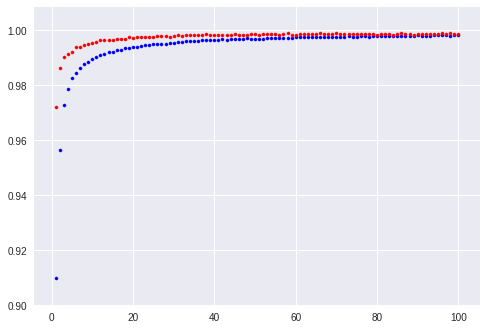

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)
ip_range=[]
for i in range(1,len(acc)+1):
    ip_range.append(i)

    
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(
  x=ip_range,
  y=acc,
  s=10, c='b', marker="o")

ax1.scatter(
  x=ip_range,
  y=val_acc,
  s=10, c='r', marker="o",)

plt.show()

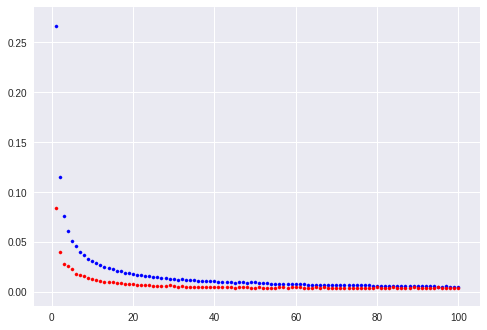

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(
  x=ip_range,
  y=loss,
  s=10, c='b', marker="o")

ax1.scatter(
  x=ip_range,
  y=val_loss,
  s=10, c='r', marker="o",)

plt.show()

In [0]:
model.save('models/minist_keras.h5')

In [0]:
predictions = model.predict_classes(test_images, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("mnist_keras.csv", index=False, header=True)